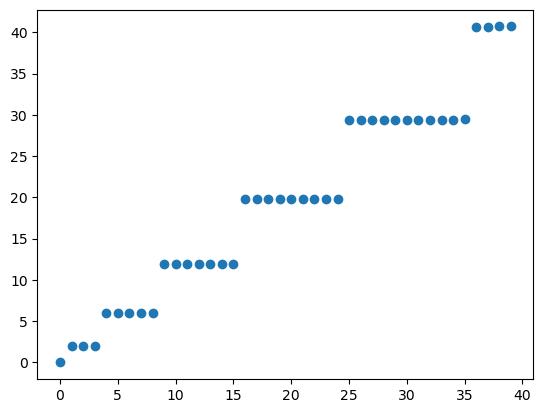

In [ ]:
import numpy as np
import easypde
import matplotlib.pyplot as plt

# Scatter points on sphere.
np.random.seed(0)
points = np.random.randn(2000, 3)

# Relax the points.
for i in range(40):
    points += easypde.pointcloud.repulsive_force(points, points, 5./40, 10.)*0.01
    points /= np.sqrt(np.sum(np.square(points), axis=-1)).reshape((-1, 1))

# Fill matrix A.
np.random.seed(0)
A = np.zeros((len(points), len(points)))
weight_distribution_radius = easypde.pointcloud.get_typical_distance(points)*0.1
for i, point in enumerate(points):
    easypde.edit_A(i, A, points, point, 16, [0, 0, 0, 1, 0, 1],
                   weight_distribution_radius=weight_distribution_radius,
                   space_type='subspace', basis_of_subspace=easypde.math.get_perpendicular_subspace([point]))

# Calculate eigenvalues and eigenvectors of A.
eig = np.linalg.eig(A)

plt.plot(np.sort(np.abs(eig[0]))[:40], 'o')  # Plot eigenvalues.

In [6]:
np.random.seed(0)
A = np.zeros((len(points), len(points)))
weight_distribution_radius = easypde.pointcloud.get_typical_distance(points)*0.1
for i, point in enumerate(points):
    easypde.edit_A(i, A, points, point, 16, [0, 0, 0, 1, 0, 1.1],
                   weight_distribution_radius=weight_distribution_radius,
                   space_type='subspace', basis_of_subspace=easypde.math.get_perpendicular_subspace([point], guide_directions=[[0, 0, 1]]))
    
# Calculate eigenvalues and eigenvectors of A.
eig = np.linalg.eig(A)

# Visualize the 22th eigenvector.
eigenvector_id = 21
easypde.plot_points((points.T*np.abs(eig[1].T[np.lexsort([np.abs(eig[0])])[eigenvector_id]])).T,
                    field=np.real(eig[1].T[np.lexsort([np.abs(eig[0])])[eigenvector_id]]), point_size=17)